# Advanced topics

## Course: Programming and Data Management (EDI 3400)

### *Vegard H. Larsen (Department of Data Science and Analytics)*

## Plan for today: 

1. IDEs
2. Generative AI 
3. The Monte Carlo method
4. Statistical analysis

# 1. Integrated Development Environments

Integrated Development Environments, or IDEs, are powerful software suites that offer a comprehensive set of tools designed to enhance a programmer's productivity and ease the software development process. At its core, an IDE typically consists of a source code editor, debugger, and build automation tools. However, many modern IDEs also come equipped with features like code suggestions, error highlighting, integrated version control, and even graphical interfaces for designing layouts or visualizing data.

When just beginning to learn programming, starting with a basic text editor might seem sufficient. And indeed, for very simple scripts or programs, it often is. However, as one delves deeper into more complex projects, the benefits of an IDE become evident. The interactive debugging tools alone, which allow developers to pause, inspect, and modify their code mid-execution, can save countless hours of searching for bugs or issues. Moreover, the code auto-completion and intelligent suggestions that many IDEs offer can significantly accelerate the coding process, reduce errors, and help students learn more about programming languages and libraries as they work.

Investing time in understanding and mastering an IDE is akin to investing in a high-quality set of tools for any craft. Yes, you can build a table with basic hand tools, but using power tools can make the process faster, more accurate, and even more enjoyable. Similarly, familiarizing oneself with an IDE early on equips you with skills that will greatly aid the efficiency and efficacy as you tackle more advanced projects and enter the professional realm.

# 2 Generative AI

## 2.1. Github Copilot

GitHub Copilot is a tool developed by GitHub in collaboration with OpenAI, offering an AI-powered code assistant directly within your coding environment. Think of it as an incredibly knowledgeable coding partner that can suggest entire lines or blocks of code, help you navigate tricky programming challenges, and even provide documentation on-the-fly. Copilot is trained on vast amounts of code from the public repositories on GitHub, which allows it to understand context, predict coding patterns, and assist with a wide range of programming languages, including Python.

## 2.2. ChatGPT
ChatGPT, powered by OpenAI's advanced GPT-4 architecture, is a state-of-the-art language model designed to generate human-like text based on the input it receives. With its expansive training data and intricate understanding of language nuances, ChatGPT can engage users in diverse conversations, answer questions, generate content, and assist in various tasks. Its wide-ranging capabilities make it a versatile tool for numerous applications, from education and content creation to research and entertainment. By simulating human-like interactions, ChatGPT pushes the boundaries of artificial intelligence and offers users a glimpse into the future of human-machine communication.

ChatGPT emerges as a dynamic resource for programmers and developers. As a vast reservoir of coding knowledge and best practices, it can swiftly assist in debugging, offer code snippets, elucidate intricate programming concepts, and provide guidance on algorithmic challenges. Beyond just being a passive reference, its interactive nature enables developers to simulate coding scenarios, test out ideas, and gain insights on optimal coding strategies. For both novice and veteran programmers, ChatGPT stands as a powerful companion, streamlining the coding process and enhancing productivity.

# 3. The Monte Carlo method

- Monte Carlo methods are a class of computational algorithms that rely on repeated random sampling to obtain numerical results.
- The underlying concept is to use randomness to solve problems that might not be stochastic by nature.
- We will use the Monte Carlo Method to solve a problem that mathematicians have been struggling with for thousands of years

## What is the value of $\pi$?

Ancient Babylonians (2000 BCE): $\pi = 3 + 1/8 \approx 3.125$ 

Archimedes (250 BCE): $223/71 < \pi < 22/7 \rightarrow 3.140845 < \pi < 3.142857$

## From Wikipedia:

$\pi$ is commonly defined as the ratio of a circle's circumference $C$ to its diameter $d$:

$$\pi ={\frac {C}{d}}$$

## $\pi$ to 10 digits:

$\pi \approx 3.1415926535$


## Let's use the Monte Carlo method to estimate $\pi$

In [1]:
# Our standard imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Functions for drawing 
# Setting function is easier

def drawBackground():
    plt.figure(figsize=(6,6))
    plt.hlines(0, xmin=-1.25, xmax=1.25, lw=2, color='black', linestyle=':')
    plt.vlines(0, ymin=-1.25, ymax=1.25, lw=2, color='black', linestyle=':')

def drawRectangle():
    plt.hlines(1, -1, 1, lw=1, color='black')
    plt.hlines(-1, -1, 1, lw=1, color='black')
    plt.vlines(1, -1, 1, lw=1, color='black')
    plt.vlines(-1, -1, 1, lw=1, color='black')

def drawCircle():
    theta = np.linspace(0, 2*np.pi, 150)
    radius = 1
    a = radius * np.cos(theta)
    b = radius * np.sin(theta)
    plt.plot(a, b, lw=1, color='black')

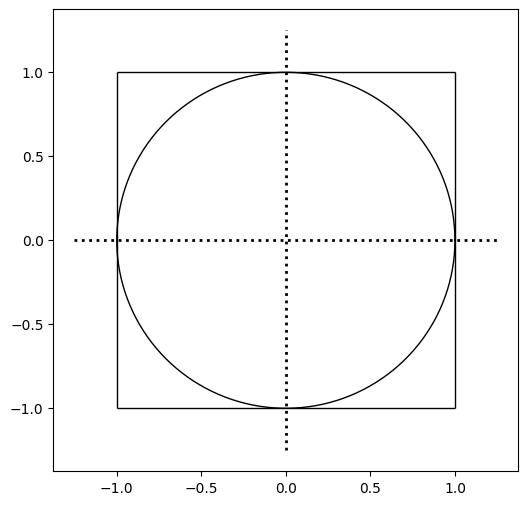

In [4]:
# Let's make a figure to visualize the problem

drawBackground()
drawRectangle()
drawCircle()

In [5]:
trails = 100
#trails = 10_000
#trails = 1_000_000
#trails = 100_000_000

random_points = pd.DataFrame([np.random.uniform(low=-1,high=1, size=trails),
                              np.random.uniform(low=-1,high=1, size=trails)],
                             index=['x', 'y']).T
random_points.tail()

,x,y
95,-0.251378,0.577652
96,-0.316519,-0.911337
97,0.649281,0.312965
98,0.034892,0.508847
99,-0.399549,-0.047345


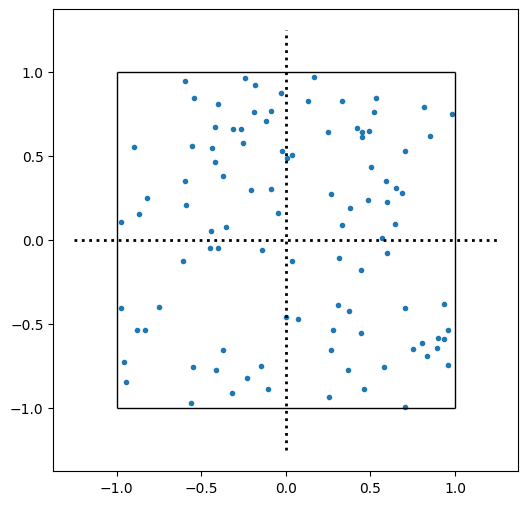

In [6]:
# Let's plot the points in our figure. 
# The points are constructed so all of them are within the square 

drawBackground()
drawRectangle()
plt.scatter(random_points['x'], random_points['y'], marker='.')

## Are the points inside or outside the circle?

We know from the Pythagorean theorem that the distance from the origin to a point $(x,y)$ is given by:

$$d = \sqrt{x^2 + y^2}$$

If $d < 1$, the point is inside the circle. If $d > 1$, the point is outside the circle.

In [7]:
# Check if the points are inside or outside the circle using the Pythagorean theorem

distanse_from_orign = np.sqrt(random_points['x']**2 + random_points['y']**2) 

random_points['in_circle'] = distanse_from_orign < 1
random_points.sample(10)

,x,y,in_circle
47,-0.146126,-0.749814,True
82,-0.896142,0.553867,False
74,-0.023832,0.532787,True
40,0.752963,-0.648851,True
49,0.308828,-0.387255,True
53,-0.956215,-0.721924,False
73,0.167549,0.973758,True
75,-0.977782,0.107841,True
37,0.957101,-0.742709,False
59,0.376816,0.189718,True


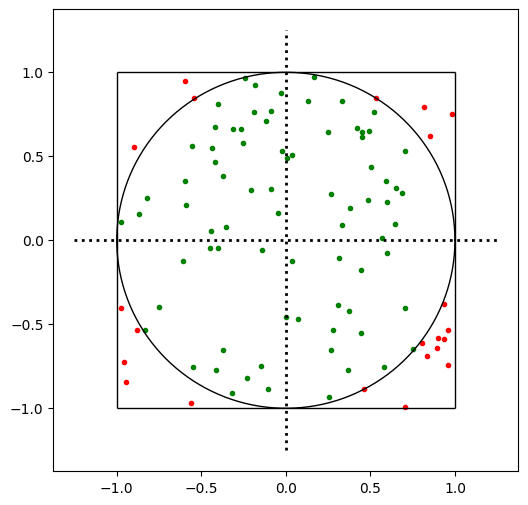

In [8]:
# Lets plot the points in our figure with different colors if we are inside or outside the circle

drawBackground()
drawCircle()
drawRectangle()

plt.scatter(random_points[random_points.in_circle == True]['x'], 
            random_points[random_points.in_circle == True]['y'], color='green', marker='.')
plt.scatter(random_points[random_points.in_circle == False]['x'], 
            random_points[random_points.in_circle == False]['y'], color='red',marker='.')

## What is the value of $\pi$?


$$ \frac{Area_{circle}}{Area_{square}} = \frac{\pi r^2}{4r^2} = \frac{\pi}{4} $$

When the number of points become large, we have that

$$  \frac{Area_{circle}}{Area_{square}} = \frac{\text{number of points within the circle}}{\text{number of points within the square}} $$

$$ \pi = 4 * \frac{\text{number of points within the circle}}{\text{number of points within the square}}$$

In [9]:
# We have all the information we need to calculate an estimate of pi

pi = 4 * len(random_points[random_points.in_circle == True]) / trails

print(f'Our estimated value of pi is {pi:.5f}.')

Our estimated value of pi is 3.12000.


# 4. Statistical analysis

In [10]:
# Let's use some data from the seaborn library again

import seaborn as sns

healthexp = sns.load_dataset('healthexp')
healthexp.sample(5)

,Year,Country,Spending_USD,Life_Expectancy
222,2012,France,4299.434,82.1
41,1980,Japan,535.016,76.1
11,1972,Japan,185.390,73.2
20,1975,France,363.610,73.0
68,1985,USA,1735.156,74.7


In [11]:
pd.read_csv('healthexp.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'healthexp.csv'

## What is the average spending and life expectancy in this sample?

In [12]:
# The mean

healthexp[['Spending_USD', 'Life_Expectancy']].mean()

Spending_USD       2789.338905
Life_Expectancy      77.909489
dtype: float64

In [13]:
# The median

healthexp[['Spending_USD', 'Life_Expectancy']].median()

Spending_USD       2295.578
Life_Expectancy      78.100
dtype: float64

## More descriptive statistics

In [14]:
healthexp.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


### What country has the max life expectancy and which year was that?

In [15]:
# Sort data by life expectancy

healthexp.sort_values(by='Life_Expectancy', ascending=False).head(1)

,Year,Country,Spending_USD,Life_Expectancy
272,2020,Japan,4665.641,84.7


In [16]:
# Find the index with the maximum life expectancy

healthexp['Life_Expectancy'].idxmax()

272

In [17]:
# The row with the maximum life expectancy

healthexp.loc[272]

Year                   2020
Country               Japan
Spending_USD       4665.641
Life_Expectancy        84.7
Name: 272, dtype: object